Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (patient doesn't have breast cancer) or malignant (patient has breast cancer). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.


In this excercise, we will be analyzing ultrasound data of breast cancer tumors. Several characteristics of the tumor are given in the dataset and we will create a model that will predict whether or not a patient has a positive breast cancer diagnosis based off of the tumor characteristics.

This data set contains the following features:

* id (patientid)
* name
* radius (the distance from the center to the circumference of the tumor)
* texture (standard deviation of gray-scale values)
* perimeter (circumference of the tumor, approx. 2*3.14 *radius)
* area
* smoothness (local variation in radius lengths)
* compactness
* concavity (severity of concave portions of the contour)
* symmetry
* fractal_dimension
* age
* diagnosis: 0 or 1 indicating whether patient has breast cancer or not




## Library and Data Import

In [1]:
import pandas as pd

In [2]:
bcd = pd.read_csv("breastcancer.csv")

In [3]:
bcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                   569 non-null object
name                 569 non-null object
radius               498 non-null float64
texture              569 non-null float64
perimeter            569 non-null float64
area                 569 non-null float64
smoothness           569 non-null float64
compactness          569 non-null float64
concavity            569 non-null float64
symmetry             569 non-null float64
fractal_dimension    569 non-null float64
age                  569 non-null int64
diagnosis            569 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [4]:
bcd.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis through Visualizations


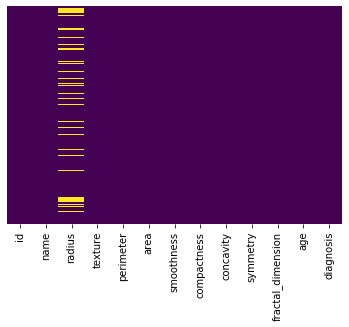

In [6]:
sns.heatmap(bcd.isnull(), yticklabels = False, cbar=False, cmap="viridis")

In [7]:
sns.set_style("whitegrid")

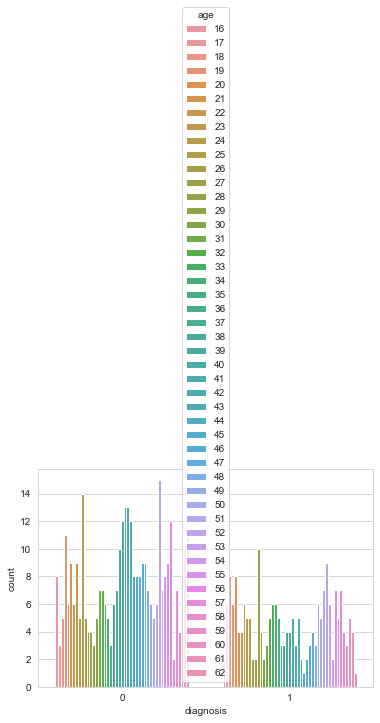

In [8]:
sns.countplot(x="diagnosis", hue="age", data=bcd)

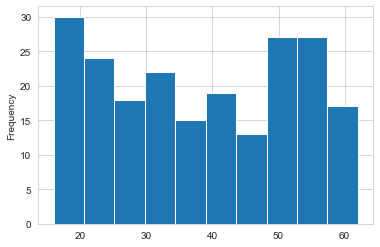

In [9]:
bcd[bcd["diagnosis"] == 1]["age"].plot.hist()

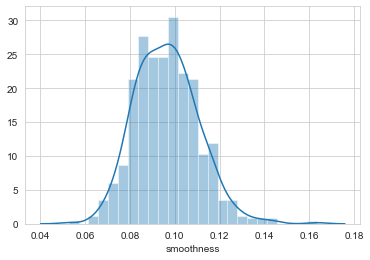

In [10]:
sns.distplot(bcd["smoothness"])

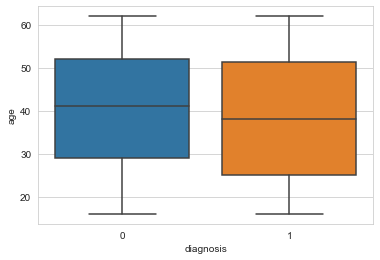

In [11]:
sns.boxplot(x="diagnosis", y="age", data=bcd)

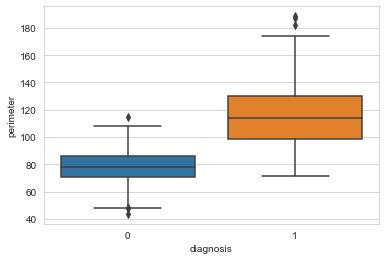

In [12]:
sns.boxplot(x="diagnosis", y="perimeter", data=bcd)

## Data Cleaning

In [13]:
# Find missing radius using perimeter
def impute_radius(cols):
    radius = cols[0]
    perimeter = cols[1]
    
    if pd.isnull(radius):
        return perimeter/(2 * 3.14159)
    else:
        return radius

In [16]:
# Compute and assign missing radius values
bcd["radius"] = bcd[["radius", "perimeter"]].apply(impute_radius, axis=1)

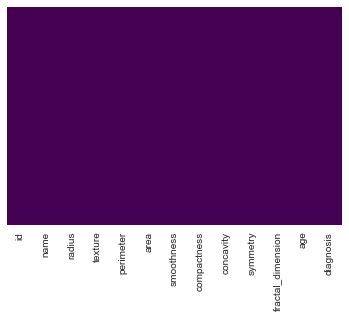

In [17]:
# Making sure there are no more null values.
sns.heatmap(bcd.isnull(), yticklabels = False, cbar=False, cmap='viridis')

C:\Users\jashd\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jashd\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


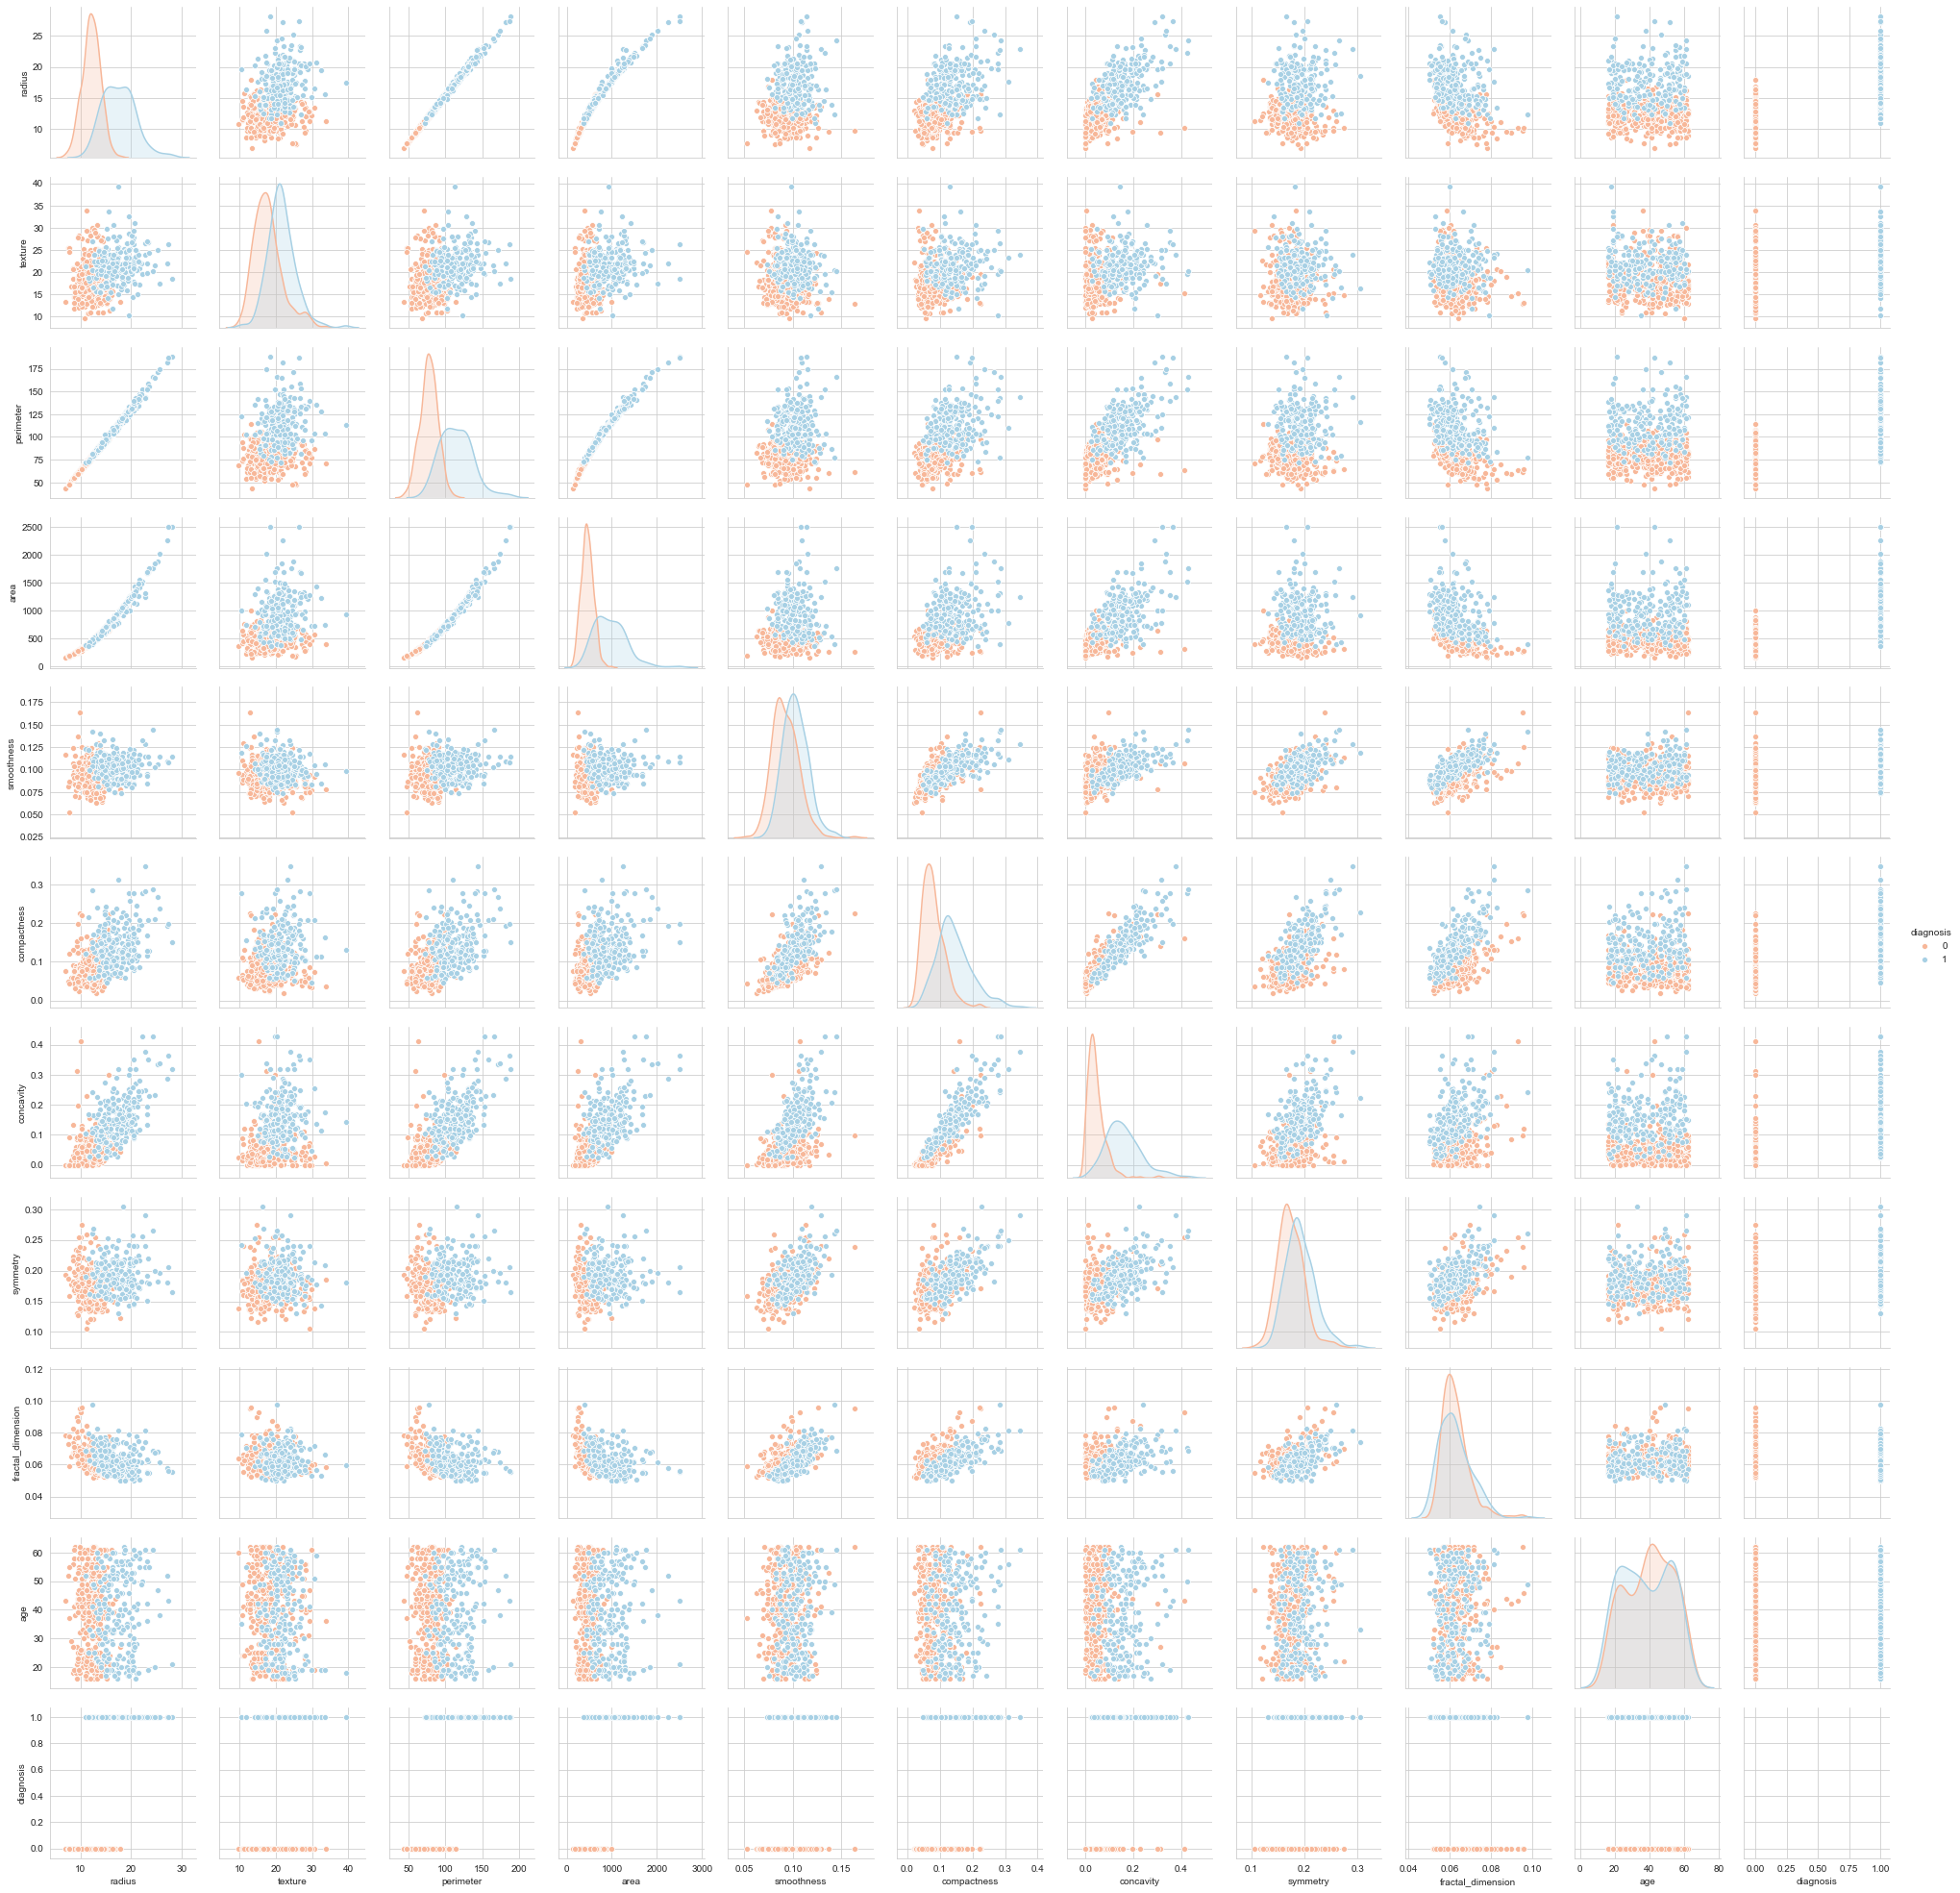

In [18]:
# Pairplot to understand the variable correlation
sns.pairplot(data=bcd, hue='diagnosis', palette='RdBu')

In [19]:
bcd.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,19.544244,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.570000,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.690000,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,12.347251,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.290000,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [20]:
# Create X and Y variables.
Y = bcd['diagnosis']
X = bcd.drop("diagnosis", axis=1)

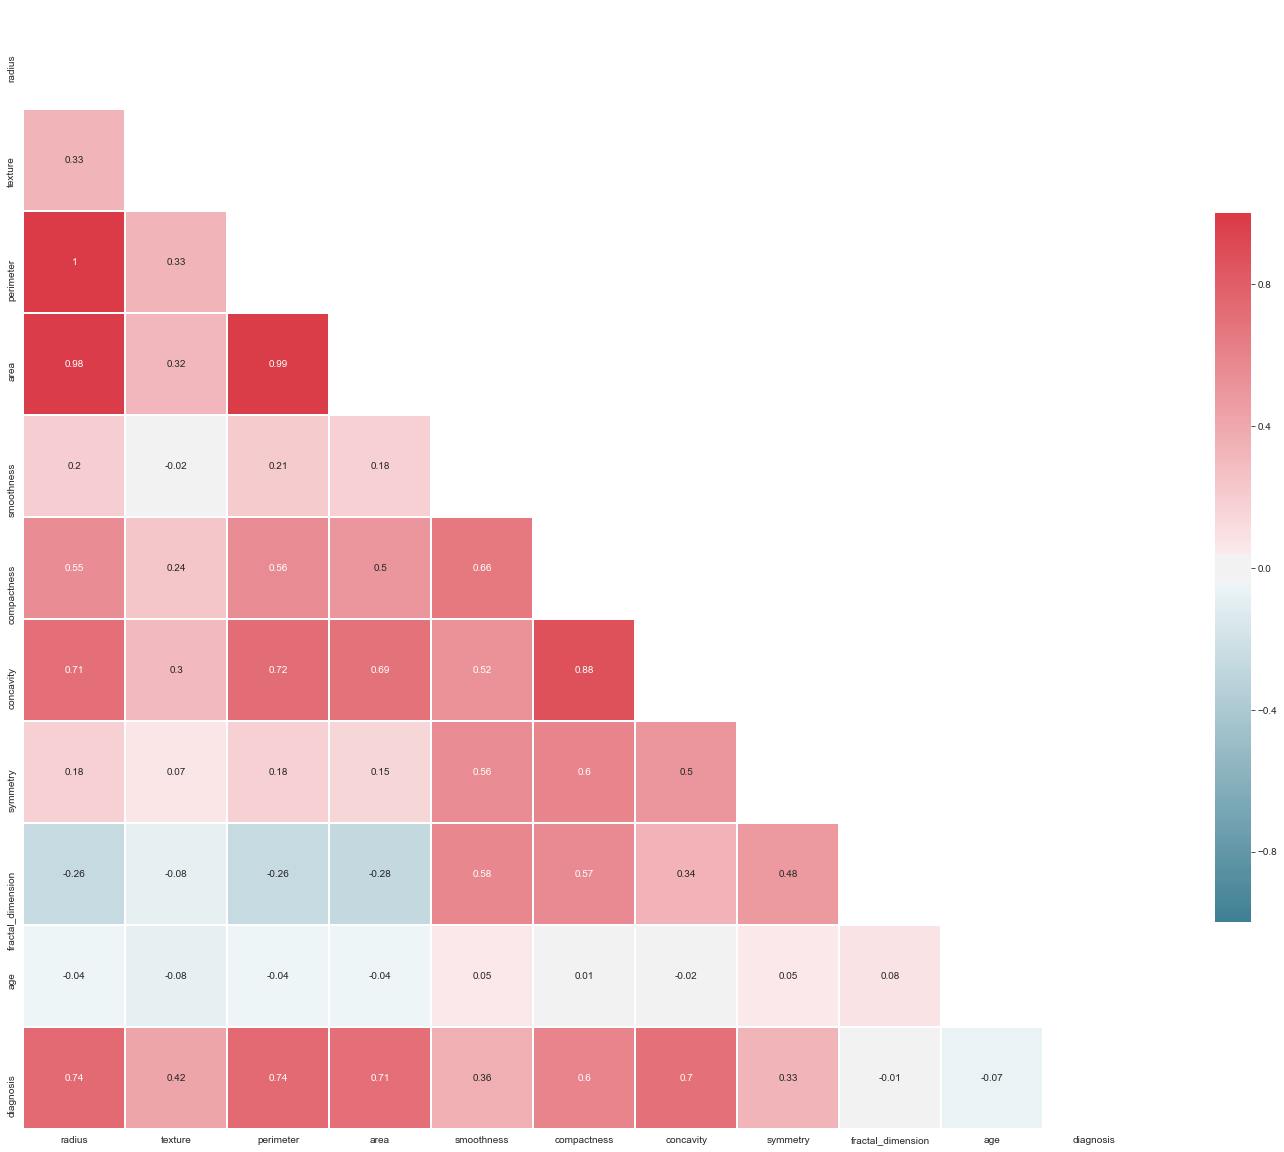

In [21]:
import numpy as np
# Generate and visualize the correlation matrix
corr = bcd.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [22]:
# Based on the above correlation heat mat we can remove some highly correlated variables:
X.drop(["id", "name", "fractal_dimension", "smoothness"], axis=1, inplace=True)

In [23]:
X.head()

,radius,texture,perimeter,area,compactness,concavity,symmetry,age
0,19.544244,10.38,122.80,1001.0,0.27760,0.3001,0.2419,35
1,20.570000,17.77,132.90,1326.0,0.07864,0.0869,0.1812,27
2,19.690000,21.25,130.00,1203.0,0.15990,0.1974,0.2069,31
3,12.347251,20.38,77.58,386.1,0.28390,0.2414,0.2597,49
4,20.290000,14.34,135.10,1297.0,0.13280,0.1980,0.1809,20


In [24]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Building the Model

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Build the model with solver as liblinear to avoid the warning. 
# Also for small datasets liblinear is a good algorithm to be usued.
logreg = LogisticRegression(solver='liblinear')

In [28]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [29]:
predictions = logreg.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       105
           1       0.88      0.80      0.84        66

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



# Conclusion - Based on the classification matrix, we could see that the model is 88% accurate.

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test, predictions)

array([[98,  7],
       [13, 53]], dtype=int64)

# Conclusion  - Based on the confusion matrix, we could see we have 98 True Positives and 7 False positives, 13 False Negatives and 53 True Negatives

In [34]:
# Model Optimization steps
# # Create a string for the formula
# cols = X.columns
# formula = 'diagnosis ~ ' + ' + '.join(cols)
# #formula = ' + '.join(cols)
# print(formula, '\n')

In [35]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# # Run the model and report the results
# model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
# logistic_fit = model.fit()

# print(logistic_fit.summary())